In [1]:
from src.training.training import train_model, train_and_save, load_model
from src.models.get_data import get_tensors
from src.visualization.brier_score import make_brier_skill_plot
from src.visualization.plot_forecasts import plot_weight_mixture
import numpy as np
import tensorflow as tf

2024-04-11 14:22:38.013916: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-11 14:22:38.048870: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 14:22:38.048897: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 14:22:38.049618: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-11 14:22:38.054058: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-11 14:22:38.054498: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
forecast_distribution = 'distr_trunc_normal'
distribution_1 = 'distr_trunc_normal'
distribution_2 = 'distr_log_normal'

loss = 'loss_CRPS_sample' # options: loss_CRPS_sample, loss_twCRPS_sample, loss_log_likelihood

chain_function = 'chain_function_normal_cdf_plus_constant' # options: chain_function_normal_cdf, chain_function_indicator, chain_function_normal_cdf_plus_constant
chain_function_mean = 13
chain_function_std = 2
chain_function_threshold = 15 # 12 / 15
chain_function_constant = 0.07

optimizer = 'Adam'
learning_rate = 0.03
folds = [1,2]
neighbourhood_size = 11
ignore = ['229', '285', '323']
epochs = 600

samples = 100
printing = False
pretrained = True
random_init = False

all_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

location_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

scale_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

In [3]:
tn_models = {} 
for i in range(0, 3):
    model = train_model(
    forecast_distribution,
    loss,
    optimizer,
    learning_rate,
    folds,
    all_features,
    location_features,
    scale_features,
    neighbourhood_size,
    ignore,
    epochs,

    chain_function = chain_function,
    chain_function_mean = chain_function_mean,
    chain_function_std = chain_function_std,
    chain_function_constant = chain_function_constant,
    chain_function_threshold = chain_function_threshold,
    samples = samples,
    printing = printing,
    distribution_1 = distribution_1,
    distribution_2 = distribution_2,
    pretrained = pretrained,
    random_init = random_init
    )
    tn_models[str(i)] = model
    print("Done with model " + str(i))

Using default parameters for truncated normal distribution
Final loss:  0.9039049
Done with model 0
Using default parameters for truncated normal distribution
Final loss:  0.9060022
Done with model 1
Using default parameters for truncated normal distribution
Final loss:  0.90499794
Done with model 2


In [4]:
forecast_distribution = 'distr_log_normal'

ln_models = {}
for i in range(0, 3):
    model = train_model(
    forecast_distribution,
    loss,
    optimizer,
    learning_rate,
    folds,
    all_features,
    location_features,
    scale_features,
    neighbourhood_size,
    ignore,
    epochs,

    chain_function = chain_function,
    chain_function_mean = chain_function_mean,
    chain_function_std = chain_function_std,
    chain_function_constant = chain_function_constant,
    chain_function_threshold = chain_function_threshold,
    samples = samples,
    printing = printing,
    distribution_1 = distribution_1,
    distribution_2 = distribution_2,
    pretrained = pretrained,
    random_init = random_init
    )
    ln_models[str(i)] = model
    print("Done with model " + str(i))

Using default parameters for Log Normal distribution
Final loss:  0.9084442
Done with model 0
Using default parameters for Log Normal distribution
Final loss:  0.90754044
Done with model 1
Using default parameters for Log Normal distribution
Final loss:  0.90916216
Done with model 2


In [5]:
loss = 'loss_twCRPS_sample' # options: loss_CRPS_sample, loss_twCRPS_sample, loss_log_likelihood

chain_function = 'chain_function_normal_cdf'

forecast_distribution = 'distr_trunc_normal'

tn_models_twCRPS = {}
for i in range(0, 3):
    model = train_model(
    forecast_distribution,
    loss,
    optimizer,
    learning_rate,
    folds,
    all_features,
    location_features,
    scale_features,
    neighbourhood_size,
    ignore,
    epochs,

    chain_function = chain_function,
    chain_function_mean = chain_function_mean,
    chain_function_std = chain_function_std,
    chain_function_constant = chain_function_constant,
    chain_function_threshold = chain_function_threshold,
    samples = samples,
    printing = printing,
    distribution_1 = distribution_1,
    distribution_2 = distribution_2,
    pretrained = pretrained,
    random_init = random_init
    )
    tn_models_twCRPS[str(i)] = model
    print("Done with model " + str(i))


Using default parameters for truncated normal distribution
Final loss:  0.0489729
Done with model 0
Using default parameters for truncated normal distribution
Final loss:  0.049303632
Done with model 1
Using default parameters for truncated normal distribution
Final loss:  0.04886019
Done with model 2


In [6]:
forecast_distribution = 'distr_log_normal'

ln_models_twCRPS = {}
for i in range(0, 3):
    model = train_model(
    forecast_distribution,
    loss,
    optimizer,
    learning_rate,
    folds,
    all_features,
    location_features,
    scale_features,
    neighbourhood_size,
    ignore,
    epochs,

    chain_function = chain_function,
    chain_function_mean = chain_function_mean,
    chain_function_std = chain_function_std,
    chain_function_constant = chain_function_constant,
    chain_function_threshold = chain_function_threshold,
    samples = samples,
    printing = printing,
    distribution_1 = distribution_1,
    distribution_2 = distribution_2,
    pretrained = pretrained,
    random_init = random_init
    )
    ln_models_twCRPS[str(i)] = model
    print("Done with model " + str(i))

Using default parameters for Log Normal distribution
Final loss:  0.048937667
Done with model 0
Using default parameters for Log Normal distribution
Final loss:  0.048944052
Done with model 1
Using default parameters for Log Normal distribution
Final loss:  0.04931842
Done with model 2


In [8]:
test_fold = 3
ignore = ['229', '285', '323']
X_test, y_test = get_tensors(neighbourhood_size, all_features, test_fold, ignore)
X_test = tn_models['0'].normalize_features(X_test)



In [7]:
fold_1 = 1
fold_2 = 2
X_1, y_1 = get_tensors(neighbourhood_size, all_features, fold_1, ignore)
X_2, y_2 = get_tensors(neighbourhood_size, all_features, fold_2, ignore)

X_1 = tn_models['0'].normalize_features(X_1)
X_2 = tn_models['0'].normalize_features(X_2)

#add X_1 to X_2 and y_1 to y_2
X = tf.concat([X_1, X_2], 0)
y = tf.concat([y_1, y_2], 0)

print(X.shape)


(15733, 5)


In [8]:
folder = '/net/pc200239/nobackup/users/hakvoort/models/emos/'

base_model = load_model(folder + 'trunc_normal/tn_crps__epochs600_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

Using given parameters for Truncated Normal distribution


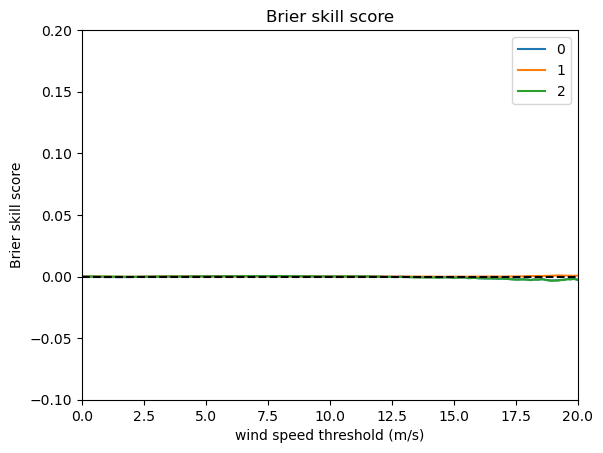

In [10]:
values = np.linspace(0, 20, 200)
ylim = [-0.1, 0.2]
make_brier_skill_plot(base_model, tn_models, X, y, values, ylim=ylim)

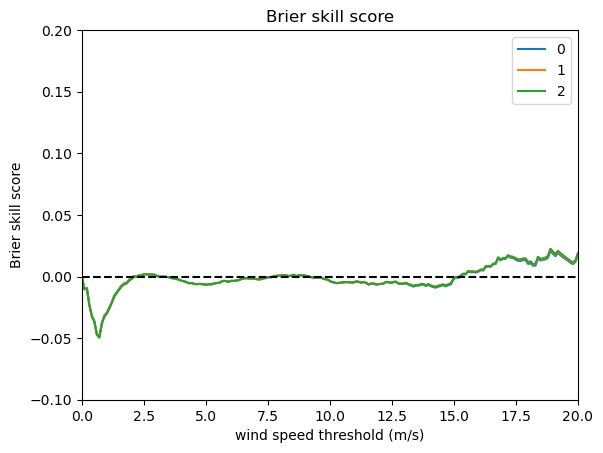

In [11]:
make_brier_skill_plot(base_model, ln_models, X, y, values, ylim=ylim)

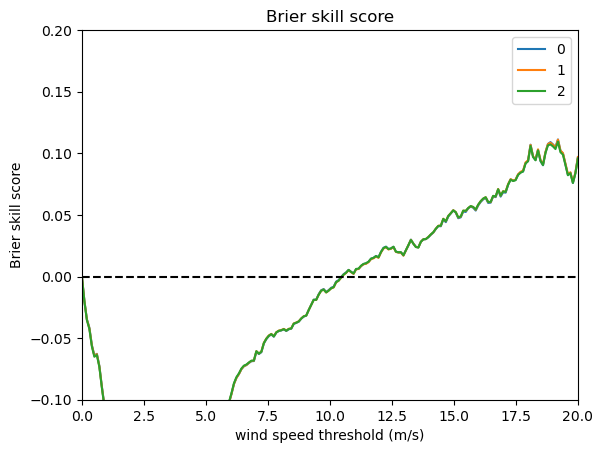

In [13]:
make_brier_skill_plot(base_model, tn_models_twCRPS, X, y, values, ylim=ylim)

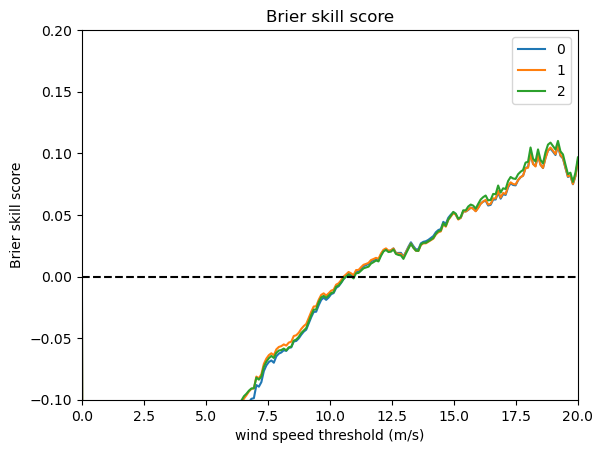

In [14]:
make_brier_skill_plot(base_model, ln_models_twCRPS, X, y, values, ylim=ylim)